# Problem set 3 (90 pts)

## Important note: the template for your solution filename is Name_Surname_PS3.ipynb
For this problem set we do not run the bot, so try to debug your solutions with your own simple tests

## Problem 1 (20 pts)

- ✓(5 pts) Prove that $\mathrm{vec}(AXB) = (B^\top \otimes A)\, \mathrm{vec}(X)$ if $\mathrm{vec}(X)$ is a columnwise reshape of a matrix into a long vector. What does it change if the reshape is rowwise? 

**Note:** 
1. To make a columnwise reshape in Python one should use ```np.reshape(X, order='f')```, where the string ```'f'``` stands for the Fortran ordering. 
2. If $\mathrm{vec}(X)$ is a rowwise reshape,
$$\mathrm{vec}(AXB)=(A \otimes B^\top) \mathrm{vec}(X).$$


- ✓(2 pts) What is the complexity of a naive computation of $(A \otimes B) x$? Show how it can be reduced.

- ✓(3 pts) Let matrices $A$ and $B$ have eigendecompositions $A = S_A\Lambda_A S_A^{-1}$ and $B = S_B\Lambda_B S^{-1}_B$. Find eigenvectors and eigenvalues of the matrix $A\otimes I + I \otimes B$.


- (10 pts) Let $A = \mathrm{diag}\left(\frac{1}{1000},\frac{2}{1000},\dots \frac{999}{1000}, 1, 1000 \right)$. Estimate analytically the number of iterations required  to solve linear system with $A$ with the relative accuracy $10^{-4}$ using
    - ✓Richardson iteration with the optimal choice of parameter (use $2$-norm)
    - Chebyshev iteration (use $2$-norm)
    - Conjugate gradient method (use $A$-norm).

### Solution
* Let's prove, that $\mathrm{vec}(AXB) = (B^\top \otimes A)\, \mathrm{vec}(X)$
$$ AXB \in R^{m \times n} = 
\begin{pmatrix} 
(AXB)_{11} & \dots & \dots & (AXB)_{1n} \\
\dots & \dots & \dots & \dots \\
(AXB)_{m1} & \dots & \dots & (AXB)_{mn}
\end{pmatrix}
$$
Let's denote as $AXB_{i}$ the i-th column of length $m$ $AXB$, then:
$$
AXB = \begin{pmatrix} 
AXB_{1} & AXB_{2} & \dots & AXB_{n}
\end{pmatrix}
$$
Then:
$$ vec(AXB) = 
\begin{pmatrix} 
AXB_{1} \\
AXB_{2} \\
\dots \\
AXB_{n}
\end{pmatrix}$$
Assuming $A \in R^{m \times p}, X \in R^{p \times q}, B^{q \times n}$:
$$
B \in R^{q \times n} = \begin{pmatrix} B_1 & B_2 & \dots & B_n \end{pmatrix}
$$
Where $B_i$ is the i-th column of matrix $B$ (later I will use this notation, without any remarks, not only for $B$, but  for $X$ matrix). We can write for i-th column $AXB_{i}$, assuming $AXB = A(XB)$:
$$
(AXB)_{i} = A(XB)_i =AXB_i =  A(\sum\limits_{j = 1}^{q}X_jB_{j,i}) = \begin{pmatrix} B_{1,i}A &  B_{2,i}A & \dots & B_{q,i}A \end{pmatrix} 
\begin{pmatrix}X_1\\
X_2 \\
\dots\\
X_q \\
\end{pmatrix} =
$$
$$
= (B_i^T \otimes A) \begin{pmatrix}X_1\\
X_2 \\
\dots\\
X_q \\
\end{pmatrix} = (B_i^T \otimes A)vec(X)
$$
Now stacking i-th columns of $AXB$ together, we receive:
$$
vec(AXB)= \begin{pmatrix}B_1^T \otimes A \\
B_2^T \otimes A \\
\dots \\
B_i^T \otimes A \\
\end{pmatrix} \begin{pmatrix}X_1\\
X_2 \\
\dots\\
X_q \\
\end{pmatrix} = (B^T \otimes A)vec(X)
$$

* Now for rowwise reshape we have (assuming that rowwise reshape is a row of rows):

$$
rowvec(AXB) = vec^T((AXB)^T) = vec^T(B^TX^TA^T) = (vec(B^TX^TA^T))^T = ((A \otimes B^T)vec(X^T))^T = rowvec(X)(A^T \otimes B)
$$

* For matrices $A \in R^{n \times n}$ and $B \in R^{n \times n}$ Kroneker product $A \otimes B \in R^{n^2 \times n^2}$. Thus, matvec $(A \otimes B)x$ complexity is $O(n^4)$. This complexity can be reduced, by using formula, represented above to $O(n^3)$, because we use 1 matmuls and 1 matvec product.

* Let's write equations for eigenvalues and eigenvectors for matrices $A,B \in R^{n \times n}$ :
$$
Ax = \lambda x, By = \nu y
$$
$$
(A \otimes I + I \otimes B)(x \otimes y) = (Ax \otimes Iy) + (Ix \otimes By) = (\lambda x \otimes y) + (x \otimes \nu y) = (\lambda + \nu)(x \otimes y)
$$
So as we can see, for matrix $(A \otimes I + I \otimes B)$  eigenvalues $(\lambda + \nu)$ and eigenvectors $(x \otimes y)$. Thus $(A \otimes I + I \otimes B) \in R^{n^2 \times n^2}$, and we can get $n^2$ eigenvalues ($\lambda_i + \nu_j, i, j = 1,\dots,n$), we've found all eigenvalues, that correspond to eigenvectors $x_i \otimes y_j$. 

* Amount of iterations comes from inequality (generally speaking, a little bit modified for Chebyshev and GG methods): $e_{k} \leq q^k e_{0} \rightarrow log(\frac{e_{k}}{e_{0}}) \leq k log(q) \rightarrow k \geq \frac{log(\frac{e_{k}}{e_{0}})}{log(q)} = log_q(\frac{e_{k}}{e_{0}})$, where $\frac{e_{k}}{e_{0}}$ - is the relative error, it's fixed in our case and equals $10^{-4}$. For Chebyshev: $e_{k} \leq Cq^k e_{0}$, for CG: $e_{k} \leq \gamma q^k e_{0}$. Assuming $C = 2, \gamma = 2$:

For Richardson iteration with the optimal choice of parameter: $q = \frac{cond(A)-1}{cond(A)+1}, $ where $cond(A) = \frac{\lambda_{max}}{\lambda_{min}} \rightarrow$ in our case $ q =\frac{cond(A)-1}{cond(A)+1} = \frac{1000 - 1/1000}{1000 + 1/1000} \rightarrow  k \geq log_q(10^{-4}) \approx 4700000$

For Chebyshev iteration: $q = \frac{\sqrt{cond(A)}-1}{\sqrt{cond(A)}+1} \rightarrow k \geq log_q(10^{-4}/C) \approx 5000 $

For Conjugate gradient method, q is the same as for Chebyshev iteration: $k \geq log_q(10^{-4}/ \gamma)  \approx 5000$

## Problem 2 (40 pts)

### Spectral graph partitioning and inverse iteration


Given connected graph $G$ and its corresponding graph Laplacian matrix $L = D - A$ with eigenvalues $0=\lambda_1, \lambda_2, ..., \lambda_n$, where $D$ is its degree matrix and $A$ is its adjacency matrix, *Fiedler vector* is an eignevector correspondng to the second smallest eigenvalue $\lambda_2$ of $L$. Fiedler vector can be used for graph partitioning: positive values correspond to the one part of a graph and negative values to another.

### Inverse power method (15 pts)

To find the Fiedler vector we will use the inverse iteration with adaptive shifts (Rayleigh quotient iteration). 

* ✓(5 pts) Write down the orthoprojection matrix on the space orthogonal to the eigenvector of $L$, corresponding to the eigenvalue $0$ and prove (analytically) that it is indeed an orthoprojection.
 
* ✓(5 pts) Implement the spectral partitioning as the function ```partition```:

* Eigenvector corresponding to the eigenvalue $0$ is $v = (1,\dots,1) \in \mathbb{R}^n$ normalize $\rightarrow v = (\frac{1}{\sqrt{n}},\dots,\frac{1}{\sqrt{n}}).$
$Q$ - projection onto $v$.
$$Q = <v,v> = vv^\top = \begin{bmatrix}\frac{1}{n} & \dots & \frac{1}{n} \\ \vdots & \ddots & \vdots \\ \frac{1}{n} & \dots & \frac{1}{n}\end{bmatrix} \in \mathbb{R}^{n\times n}.$$
Matrix $Q$ is orthoprojection iff $Q^2 = Q$ and $Q^* = Q$. 
Thus $Q^2 = Q \rightarrow Q$ and $Q^* = Q$ - orthoprojection matrix. 


Let's denote the orthoprojection matrix on the space orthogonal to the eigenvector of  𝐿, corresponding to the eigenvalue  0 as P, then:

$$P = I - vv^T = \begin{bmatrix}
\frac{n-1}{n} & -\frac{1}{n} & \dots & -\frac{1}{n} \\
-\frac{1}{n} & \frac{n-1}{n} & \dots & -\frac{1}{n} \\
\vdots &\vdots & \ddots & \vdots \\
-\frac{1}{n} &-\frac{1}{n} & \dots & \frac{n-1}{n}
\end{bmatrix} \in \mathbb{R}^{n\times n}.$$

$P^2 = P$ and $ P^* = P \rightarrow P$ is orthoprojection matrix.

$P^2 = (I - vv^T)(I - vv^T) = (I - vv^T - vv^T + (vv^T)^2) = (I - vv^T) = P$

In [1]:
import numpy as np
import scipy

In [2]:
# INPUT:
# A - adjacency matrix (scipy.sparse.csr_matrix)
# num_iter_fix - number of iterations with fixed shift (int)
# shift - (float number)
# num_iter_adapt - number of iterations with adaptive shift (int) -- Rayleigh quotient iteration steps
# x0 - initial guess (1D numpy.ndarray)
# OUTPUT:
# x - normalized Fiedler vector (1D numpy.ndarray)
# eigs - eigenvalue estimations at each step (1D numpy.ndarray)
# eps - relative tolerance (float)
def partition(A, shift, num_iter_fix, num_iter_adapt, x0, eps):
    x = x0
    eigs = np.array([0])
    D = scipy.sparse.diags(np.array(A.sum(axis=0))[0])    
    L = D - A 
    eigs = list(eigs)
    e0 = np.ones(x.shape[0])/np.linalg.norm(np.ones(x.shape[0]))
    P = np.identity(x.shape[0])-np.outer(e0,e0) 
    
    for i in range(num_iter_fix):
        x = P.dot(x)
        x = scipy.sparse.linalg.spsolve(L - scipy.sparse.identity(L.shape[0])*shift, x)
        x = x/np.linalg.norm(x)
        R = np.inner(x, L.dot(x))/np.inner(x, x)
        if np.abs(R - eigs[-1])/np.abs(R) <= eps: #break if condition is satisfied
            eigs.append(R)
            return x, np.array(eigs)
        eigs.append(R)
    
    R = np.inner(x, L.dot(x))/np.inner(x, x)
    for j in range(num_iter_adapt):
        x = P.dot(x) 
        x = scipy.sparse.linalg.spsolve(L - scipy.sparse.identity(L.shape[0])*R, x)
        x = x/np.linalg.norm(x)
        R = np.inner(x, L.dot(x))/np.inner(x, x)
        if np.abs(R - eigs[-1])/np.abs(R) <= eps: #break if condition is satisfied
            eigs.append(R)
            return x, np.array(eigs)
        eigs.append(R)
    eigs = np.array(eigs)
    return x,eigs

Algorithm must halt before `num_iter_fix + num_iter_adapt` iterations if the following condition is satisfied $$ \boxed{\|\lambda_k - \lambda_{k-1}\|_2 / \|\lambda_k\|_2 \leq \varepsilon} \text{ at some step } k.$$

Do not forget to use the orthogonal projection from above in the iterative process to get the correct eigenvector.
It is also a good idea to use ```shift=0``` before the adaptive stragy is used. This, however, is not possible since the matrix $L$ is singular, and sparse decompositions in ```scipy``` does not work in this case. Therefore, we first use a very small shift instead.

* ✓(3 pts) Generate a random `lollipop_graph` using `networkx` library and find its partition. [Draw](https://networkx.github.io/documentation/networkx-1.9/examples/drawing/labels_and_colors.html) this graph with vertices colored according to the partition.

* ✓(2 pts) Start the method with a random initial guess ```x0```, set ```num_iter_fix=0``` and comment why the method can converge to a wrong eigenvalue.

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

In [4]:
def network(n,m,shift,num_iter_fix,num_iter_adapt,eps):
    np.random.seed(227)
    G = nx.lollipop_graph(n,m)
    A = scipy.sparse.csr_matrix(nx.adjacency_matrix(G))
    x0 = np.random.rand(A.shape[0])
    x, eigs = partition(A, shift, num_iter_fix, num_iter_adapt, x0, eps)
    pos = [i for i in range(x.shape[0]) if np.sign(x[i]) == 1]
    neg = [i for i in range(x.shape[0]) if np.sign(x[i]) == -1]
    
    position = nx.spring_layout(G)
    nx.draw_networkx_nodes(G,position,nodelist=pos,node_color='r',node_size=50, alpha=0.8)
    nx.draw_networkx_nodes(G,position,nodelist=neg,node_color='b',node_size=50, alpha=0.8)
    nx.draw_networkx_edges(G,position)
    return None

/Users/dzisandy/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


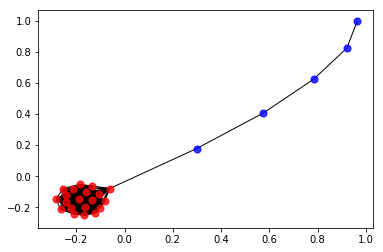

In [5]:
network(20,5,0.1,100000,100000,1e-10)

Test with ```num_iter_fix = 0```:

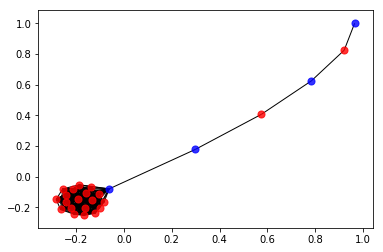

In [6]:
network(20,5,0.1,0,100000,1e-10)

The main point, that if we use ```num_iter_fix = 0```, that means we use only Rayleigh quotient iteration with dinamic shift will be used, which converges to  nearest to initial guess eigenvector and eigenvalue. The main point of fighting against it: to use fixed shift, that will prevent this scenario, because using fixed shift we prepare another initial guess, that is good in case of using with dinamic shift.

### Spectral graph properties (15 pts)

* (5 pts) Prove that multiplicity of the eigenvalue $0$ in the spectrum of the graphs Laplacian is the number of its connected components.
* (10 pts) The second-smallest eigenvalue of $L(G)$, $\lambda_2(L(G))$, is often called the algebraic connectivity of the
graph $G$. A basic intuition behind the use of this term is that a graph with a higher algebraic
connectivity typically has more edges, and can therefore be thought of as being “more connected”.  
To check this statement, create few graphs with equal number of vertices using `networkx`, one of them should be $C_{30}$ - simple cyclic graph, and one of them should be $K_{30}$ - complete graph. (You also can change the number of vertices if it makes sense for your experiments, but do not make it trivially small).
    * ✓Find the algebraic connectivity for the each graph using inverse iteration.
    * ✓Plot the dependency $\lambda_2(G_i)$ on $|E_i|$.
    * ✓Draw a partition for a chosen graph from the generated set.
    * ✓Comment on the results.

Let's denote Laplacian matrix for $i$-th graph component by $L_i$. Then, if our graph has $k$ connected components, the Laplacian matrix for the full graph can be represented as a block matrix:

$$
L = \begin{pmatrix}
L_1 & 0 & ... 0\\
 0 & L_2 & ... 0 \\
0 & 0 & ... L_k 
\end{pmatrix}
$$

We can assume, that in every block of matrix L exists eigenvector (one and the only) that corresponds to $\lambda = 0$.Also, $det(xI − L) = det(xI − L_1 ) \dots det(xI − L_k )$, so the algebraic multiplicity of 0 for the entire Laplacian matrix is the sum of the algebraic multiplicity of 0 of each $L_i$. If $G$ has $k$ connected components then this sum is $1 + \dots + 1$ $k$ times, so $k$. For the other direction, if the algebraic multiplicity of the Laplacian is $k$ then the sum is $k$ so there must be $k$ blocks in the Laplacian, and so $G$ must have $k$
connected components.



In [7]:
def graph(n):
    shift = 0.1
    num_iter_fix = 10
    num_iter_adapt = 10
    eps = 1e-16
    l_2 = []
    E = []
    G = nx.cycle_graph(30)
    A = scipy.sparse.csr_matrix(nx.adjacency_matrix(G))
    D = scipy.sparse.diags(np.array(A.sum(axis=0))[0])    
    L = D - A 
    x0 = np.random.rand(A.shape[0])
    x, eigs = partition(A, shift, num_iter_fix, num_iter_adapt, x0, eps)
    l_2.append(eigs[-1])
    E.append(G.number_of_edges())
    for i in range(n):
        G = nx.gnp_random_graph(30,(i*10+1)/100)
        A = scipy.sparse.csr_matrix(nx.adjacency_matrix(G))
        D = scipy.sparse.diags(np.array(A.sum(axis=0))[0])    
        L = D - A 
        x0 = np.random.rand(A.shape[0])
        x, eigs = partition(A, shift, num_iter_fix, num_iter_adapt, x0, eps)
        l_2.append(eigs[-1])
        E.append(G.number_of_edges())
    return l_2,E

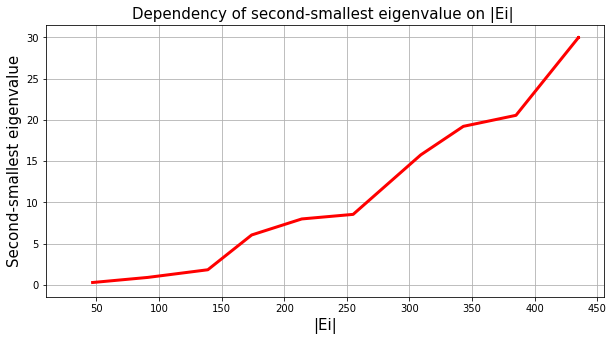

In [10]:
L,E = graph(20)
plt.figure(figsize = (10,5))
plt.plot(E,L, c = 'r', lw = 3)
plt.title('Dependency of second-smallest eigenvalue on |Ei| ',fontsize=15)
plt.ylabel('Second-smallest eigenvalue',fontsize=15)
plt.xlabel('|Ei|',fontsize=15)
plt.grid(True)

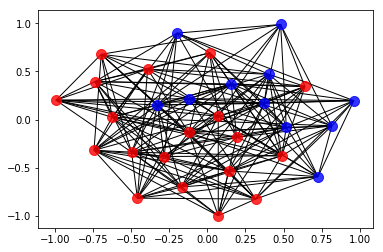

In [11]:
shift = 0.1
num_iter_fix = 10
num_iter_adapt = 10
eps = 1e-16
G = nx.gnp_random_graph(30,0.5)
A = scipy.sparse.csr_matrix(nx.adjacency_matrix(G))
x0 = np.random.rand(A.shape[0])
x, eigs = partition(A, shift, num_iter_fix, num_iter_adapt, x0, eps)
pos = [i for i in range(x.shape[0]) if np.sign(x[i]) == 1]
neg = [i for i in range(x.shape[0]) if np.sign(x[i]) == -1] 
position = nx.spring_layout(G)
nx.draw_networkx_nodes(G,position,nodelist=pos,node_color='r',node_size=100, alpha=0.8)
nx.draw_networkx_nodes(G,position,nodelist=neg,node_color='b',node_size=100, alpha=0.8)
nx.draw_networkx_edges(G,position)


## Comment on results

### Image bipartition (10 pts)

Let us deal here with a graph constructed from a binarized image.
Consider the rule, that graph vertices are only pixels with $1$, and each vertex can have no more than $8$ connected vertices (pixel neighbours), $\textit{i.e}$ graph degree is limited by 8.
* ✓(3 pts) Find an image with minimal size equal to $(256, 256)$ and binarize it such that graph built on black pixels has exactly $1$ connected component.
* (5 pts) Write a function that constructs sparse adjacency matrix from the binarized image, taking into account the rule from above.
* (2 pts) Find the partition of the resulting graph and draw the image in accordance with partition.

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import requests
import numpy as np

In [13]:
#utility from seminars and PS1
url = 'https://www.brochner-hotels.com/hotel-sp34/wp-content/uploads/sites/8/2016/11/facebook-logo-in-circular-shape_318-60407.jpg'
image_raw = Image.open(requests.get(url, stream=True).raw)
image_raw = image_raw.convert('L')
image = np.array(image_raw).astype(np.uint8)

In [14]:
def binarization(image):
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            image[i,j] =  (max(np.sign(image[i,j] - 20),0))*255 #if less 20, then black
    return image

In [15]:
image = binarization(image)

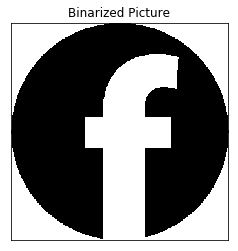

In [16]:
#utility from seminars and PS1
plt.imshow(Image.fromarray(image))
plt.xticks(())
plt.yticks(())
plt.title('Binarized Picture')
plt.show()

## Problem 3 (30 pts)

### Say hi to the drone

You received a radar-made air scan data of a terrorist hideout made from a heavy-class surveillance drone. Unfortunately, it was made with an old-fashioned radar, so the picture is convolved with the diffractive pattern. You need to deconvolve the picture to recover the building plan.

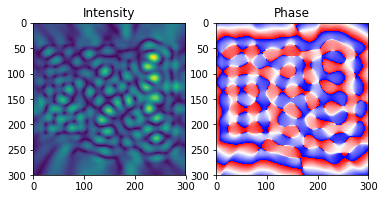

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special
from scipy.sparse.linalg import LinearOperator, gmres,cgs,qmr,bicg
radiointel = np.load('radiointel.npy')
plt.subplot(1,2,1)
plt.imshow( np.abs(radiointel) )
plt.title('Intensity')
plt.subplot(1,2,2)
plt.imshow( np.angle(radiointel), cmap='bwr' )
plt.title('Phase')
plt.show()

In this problem you asked to use using FFT-matvec and make the convolution operator for the picture of the size $N\times N$, where $N=300$ with the following kernel (2D Helmholtz scattering):
$$
T_{\overline{i_1 j_1}, \overline{i_2 j_2} } \equiv eG_{i_1-j_1,i_2-j_2}  = \frac{-1j}{4} H^{(2)}_0 \left( k_0 \cdot \Delta r_{ \overline{i_1 j_1}, \overline{i_2 j_2} } \right), \quad i_1,j_1, i_2, j_2 = 0,\dots, N-1 $$

except when both $i_1=i_2$ and $j_1 = j_2$. 

In that case set $$T_{i_1=i_2, j_1=j_2} = 0$$.

Here
$1j$ is the imaginary unit, $H^{(2)}_0(x)$ - (complex-valued) Hankel function of the second kind of the order 0. See 'scipy.special.hankel2'.

$$ \Delta r_{ \overline{i_1 j_1}, \overline{i_2 j_2} } = h \sqrt{  (i_1-i_2)^2 + (j_1-j_2)^2  } $$
$$ h = \frac{1}{N-1}$$
$$k_0 = 50.0$$


### Tasks:

1. ✓(5 pts) Create the complex-valued kernel $eG$ ($2N-1 \times 2N-1$)-sized matrix according with the instructions above. Note that at the point where $\Delta r=0$ value of $eG$ should be manually zet to zero. Store in the variable eG. Plot the eG.real of it with plt.imshow

2. ✓(5 pts) Write function `Gx` that calculates matvec of $T$ by a given vector $x$. Make sure all calculations and arrays are in dtype=np.complex64. Hint: matvex with a delta function in pl

3. ✓(3 pts) What is the complexity of one matvec? 
4. ✓(2 pts) Use `scipy.sparse.linalg.LinearOperator`  to create an object that has attribute `.dot()` (this object will be further used in the iterative process). Note that `.dot()` input and output must be 1D vectors, so do not forget to use reshape.
5. ✓(15 pts) Write a function that takes an appropriate Krylov method(s) and solves linear system $Gx=b$ to deconvolve `radiointel`. The result should be binary mask array (real, integer, of 0s and 1s) of the plane of the building. Make sure it converged sufficiently and you did the post-processing properly. Plot the result as an image. 
    
    
**Note:** You can use standart fft and ifft from e.g. `numpy.fft`


### 1. Kernel (5 pts)

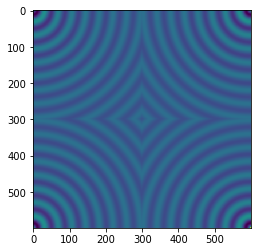

In [18]:
k0 = 50
N = 300

def make_eG(k0, N):
    # INPUT:  
    # k0 #dtype = float
    # N #dtype = int
    i,k = np.meshgrid(np.arange(-(N-1),N), np.arange(-(N-1),N))
    eG = np.array(-1*1j/4*scipy.special.hankel2(0, k0/(N-1) * np.sqrt(i**2 + k**2)), dtype = np.complex64)
    eG[N-1,N-1] = 0 # manually set to zero
    eG  = np.fft.fftshift(eG)
    # OUTPUT:
    # np.array, shape = (2N-1, 2N-1), dtype = np.complex64
    return eG

eG = make_eG(k0=k0, N=N)

plt.imshow(eG.real)

### 2. Matvec (5 pts)

In [19]:
def Gx(x, eG):
    # input:  
    # x, np.array, shape=(N**2, ), dtype = np.complex64
    # eG, np.array, shape=(2N-1, 2N-1), dtype = np.complex64
    # output:
    # matvec, np.array, shape = (N**2, ), dtype = np.complex64
    N = int((eG.shape[0]+1)/2)
    x = x.reshape(N,N) #preparation of x vector for 2D fast matvec, we need to extend this matrix to shape=(2N-1, 2N-1)
    zeros1 = np.zeros((N,N-1))
    zeros2 = np.zeros((N-1,2*N-1))
    x  = np.vstack((np.hstack((x,zeros1)),zeros2))
    matvec = np.array(np.fft.ifft2(np.fft.fft2(eG)*np.fft.fft2(x)), dtype = np.complex64)[:N,:N].reshape((N**2,))
    return matvec

### 3. Complexity (3 pts)

Big-O complexity of one matvec operation is $O((2N-1)^2log(2N-1))$. It can be shown from the fact of processing the 2 dimensional FFT. The main point that, 2 dimensional FFT, by the fact, is the 1 dimensional, but applied for every element of matrix (in our case shapes of matrices are $(2N-1,2N-1)$). For 1 dimesional complexity for vectors of size $(n,1)$ is $O(nlogn)$. Thus the complexity of matves is as following.

### 4. LinearOperator (2 pts)

In [20]:
def mv(x):
        global eG 
        return Gx(x,eG = eG)
L_Gx = scipy.sparse.linalg.LinearOperator((N**2, N**2), matvec=mv)

### 5. Reconstruction (15pts)

/Users/dzisandy/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'Convergence')

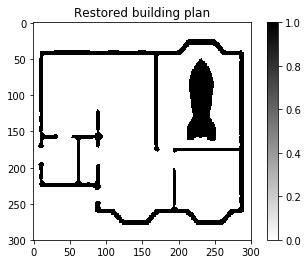

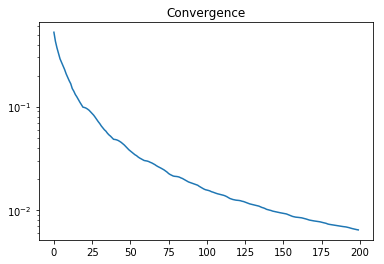

In [21]:
def normalize(mask): #proper normalization to binary mask
    mask = np.clip(mask, a_min=0, a_max=1)
    mask = np.round(mask)
    mask = np.asarray(mask, dtype=int)
    return mask

errs=[]
def callback(err): #callback function to store the history of convergence
    global errs
    errs.append(err)
    return 

# solver is  Generalized Minimal RESidual iteration 
mask = gmres(L_Gx,radiointel.reshape((N**2,1)),maxiter = 200, callback = callback)[0].reshape(N,N)

plt.figure()
plt.imshow( normalize(mask) , cmap='binary')
plt.title('Restored building plan')
plt.colorbar()

plt.figure()
plt.semilogy(errs)
plt.title('Convergence')